<a href="https://colab.research.google.com/github/Sulaiman-Nedal/Voromesh/blob/main/Voromesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


In [14]:
# Function to calculate VoroLoss (simplified version for demonstration)
def voroloss(Voronoi_diagram, target_points):

  '''
  For each point in the target set, it calculates the distance to the midpoint of each bisector between two neighboring Voronoi cells.
  It finds the closest ridge and calculates the squared distance to that ridge for each target point.
  The sum of all these squared distances is returned as the VoroLoss.
  '''

  loss = 0
  for point in target_points:
      min_dist = float('inf')
      for ridge_point in Voronoi_diagram.ridge_points:
          v0 = Voronoi_diagram.points[ridge_point[0]]
          v1 = Voronoi_diagram.points[ridge_point[1]]
          mid_point = (v0 + v1) / 2
          dist = np.linalg.norm(point - mid_point)
          if dist < min_dist:
              min_dist = dist
      loss += min_dist ** 2  # Sum of squared distances
  return loss


In [15]:
# Gradient calculation (simple numerical gradient approximation)
def calculate_gradient(Generators, target_points, lr=0.01):

  '''
  It calculates the gradient, which tells the algorithm how to adjust the positions of the generator Generators to improve the Voronoi diagram.
  It does this by making small changes (steps) in the position of each generator,
  measuring how the loss changes, and calculating the direction and size of the adjustment needed.
  '''

  grad = np.zeros_like(Generators)
  loss_base = voroloss(Voronoi(Generators), target_points)

  for i in range(Generators.shape[0]):  # For each generator point
      for j in range(Generators.shape[1]):  # For each coordinate (x, y)
          Generators[i, j] += lr  # Small step forward
          loss_new = voroloss(Voronoi(Generators), target_points)
          grad[i, j] = (loss_new - loss_base) / lr  # Gradient approximation
          Generators[i, j] -= lr  # Revert the change

  return grad


In [16]:
# Optimization function using gradient descent
def optimize_generators(Generators, target_points, lr=0.01, epochs=900):

  '''
  It runs multiple iterations (epochs) of the optimization process.
  In each iteration, it calculates the current Voronoi diagram, evaluates the VoroLoss, and computes the gradient.
  It then adjusts the Generators' positions by moving them a little bit in the direction that reduces the VoroLoss, based on the gradient.

  '''
  for epoch in range(epochs):

      vor = Voronoi(Generators)  # Create Voronoi diagram
      loss = voroloss(vor, target_points)  # Calculate VoroLoss

      grad = calculate_gradient(Generators, target_points, lr)  # Calculate gradients
      Generators -= lr * grad  # Update Generators with gradient descent

  return Generators


In [25]:
def main():

  # Step 1: Densely sample a set of points from a ground truth surface mesh
  ground_truth = np.array([
      [1, 1],
      [2, 0.67],
      [1.3, 1.4]
  ])

  # Step 2: Initialize the generators
  Generators = np.array([
      [0.66, 1],
      [1.67, 0.33],
      [2.33, 1.33]
  ], dtype=np.float64)  # Convert Generators to float

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))


  voronoi_plot_2d(Voronoi(Generators), ax=axs[0])
  axs[0].scatter(ground_truth[:, 0], ground_truth[:, 1], color='red', label='Generators to be approximated')
  axs[0].set_title('Initial Voronoi Diagram')


  # Step 3 & 4: minimize voroloss and draw voronoi
  optimized_Generators = optimize_generators(Generators, ground_truth)


  # Display the optimized Voronoi diagram
  voronoi_plot_2d(Voronoi(optimized_Generators),ax=axs[1])
  axs[1].scatter(ground_truth[:, 0], ground_truth[:, 1], color='red', label='Generators to be approximated')
  axs[1].set_title('Optimized Voronoi Diagram')

  plt.show()


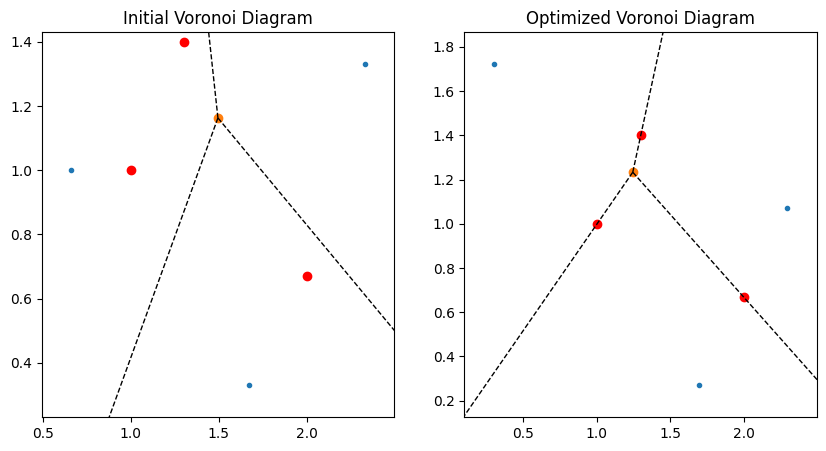

In [26]:
if __name__ == "__main__":
    main()